In [5]:
import os
import glob
import torch
import numpy as np

from sklearn import preprocessing
from sklearn import model_selection
from sklearn import metrics

import config
import dataset
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
image_files = glob.glob(os.path.join(config.DATA_DIR, "*.png"))
targets_orig = [x.split("/")[-1][:-4] for x in image_files]
targets = [[c for c in x] for x in targets_orig]
targets_flat = [c for clist in targets for c in clist]


label_enc = preprocessing.LabelEncoder()
label_enc.fit(targets_flat)

targets_enc = [label_enc.transform(x) for x in targets]
targets_enc = np.array(targets_enc) + 1
train_images, test_images, train_targets, test_targets, train_orig_targets, test_orig_targets = model_selection.train_test_split(
    image_files, targets_enc, targets_orig, test_size=0.1, random_state=42
)


train_dataset = dataset.ClassificationDataset(
    image_paths=train_images,
    targets=train_targets,
    resize=(config.IMAGE_HEIGHT, config.IMAGE_WIDTH)
)

In [16]:
img = train_dataset[199]["images"].numpy()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


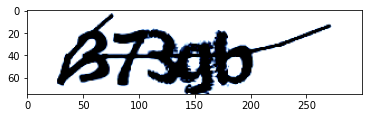

In [17]:
plt.imshow(np.transpose(img, (1, 2, 0)))